<a href="https://colab.research.google.com/github/Vasudhatapriya/AlgoBook/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [ ]:
!tesseract -v

tesseract 4.0.0-beta.1
 leptonica-1.75.3
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0

 Found AVX2
 Found AVX
 Found SSE


In [ ]:
!sudo apt-get install tesseract-ocr-eng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-eng is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [ ]:
import os
import os.path
import json
import sys
import pytesseract
import re
import argparse
import csv
import dateutil.parser as dparser
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import statistics 
import numpy as np
from pytesseract import Output
 
# im = cv2.imread('/content/samplee.jpg')
# gray = 255 - cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [ ]:
!pip install imutils

In [ ]:
im = cv2.imread('/content/test3.jpg')
d = pytesseract.image_to_data(im, output_type=Output.DICT)
h=[]
n_boxes = len(d['level'])
for i in range(n_boxes):
  (xcood, ycood, width, height) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
  cv2.rectangle(im, (xcood, ycood), (xcood+width, ycood+height), (0, 255, 0), 2)
  h.append(height)
height=(statistics.mode(h))
height=height+1
print(height)

13


In [ ]:
# cv2_imshow(im)

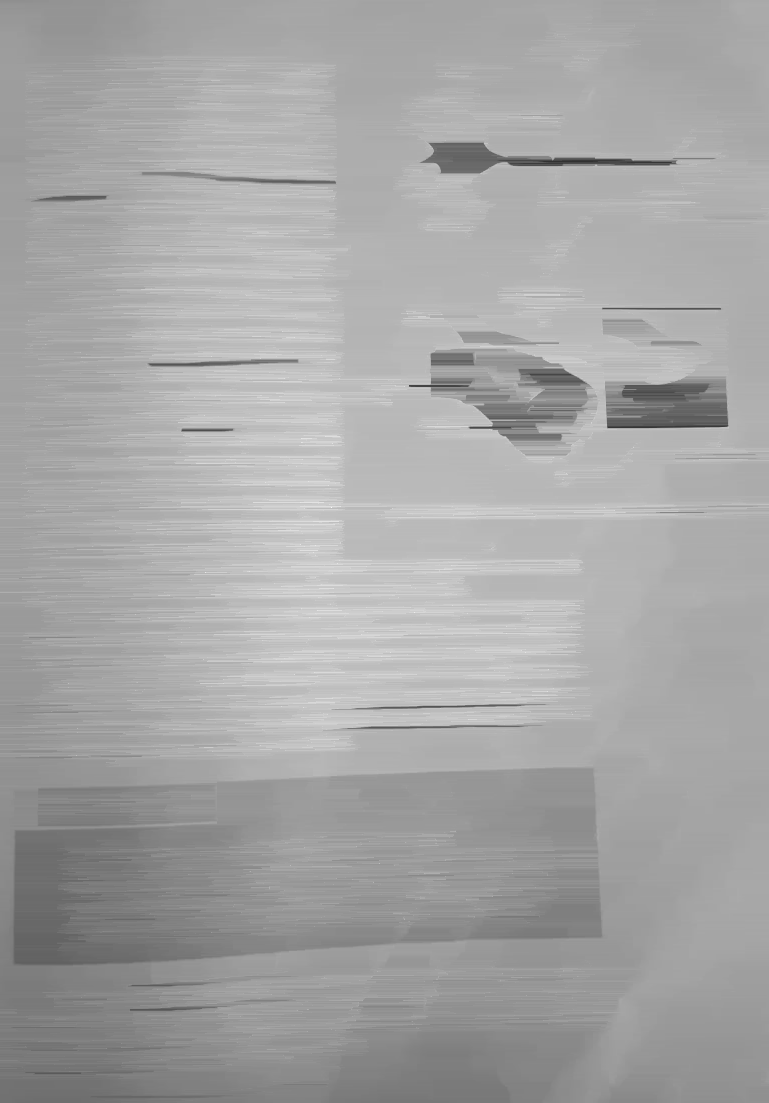

In [ ]:
## Read
img = cv2.imread("/content/test3.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

##Create long line kernel, and do morph-close-op
kernel = np.ones((1,40), np.uint8)
morphed = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
cv2.imwrite("line_detected.png", morphed)
cv2_imshow(morphed)

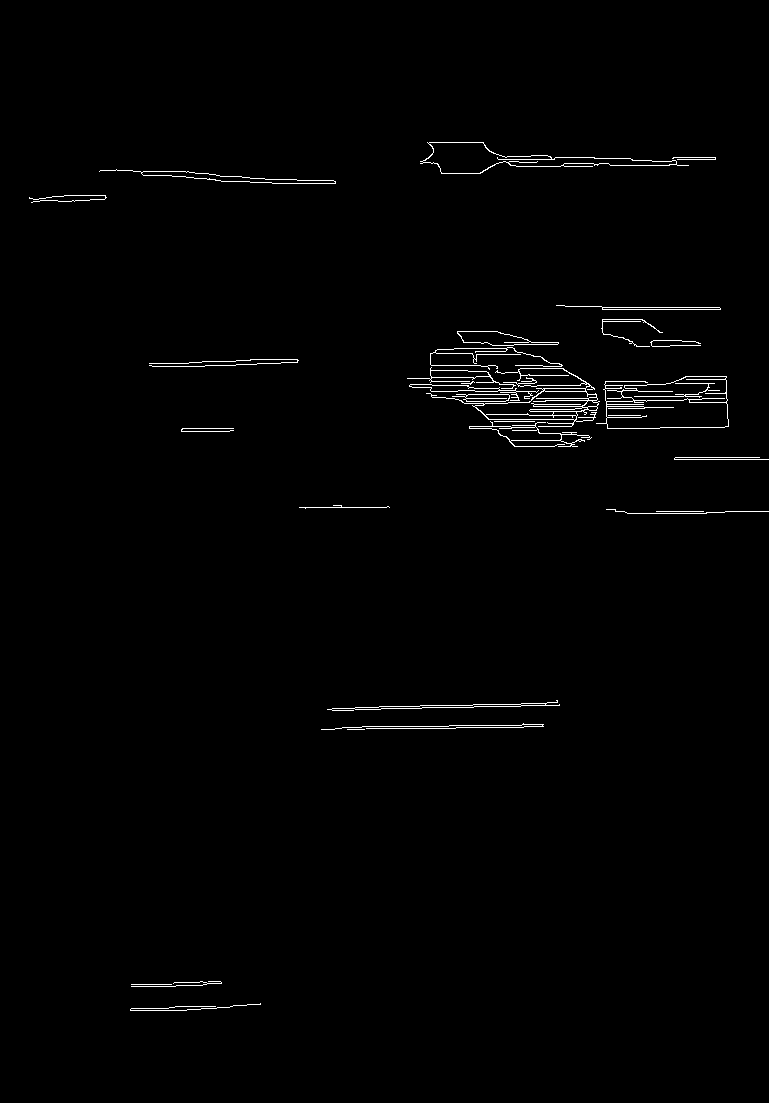

Number of Contours found = 29
line


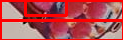

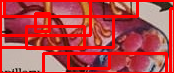

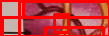

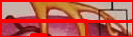

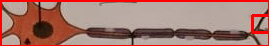

square


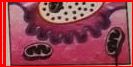

circle


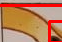

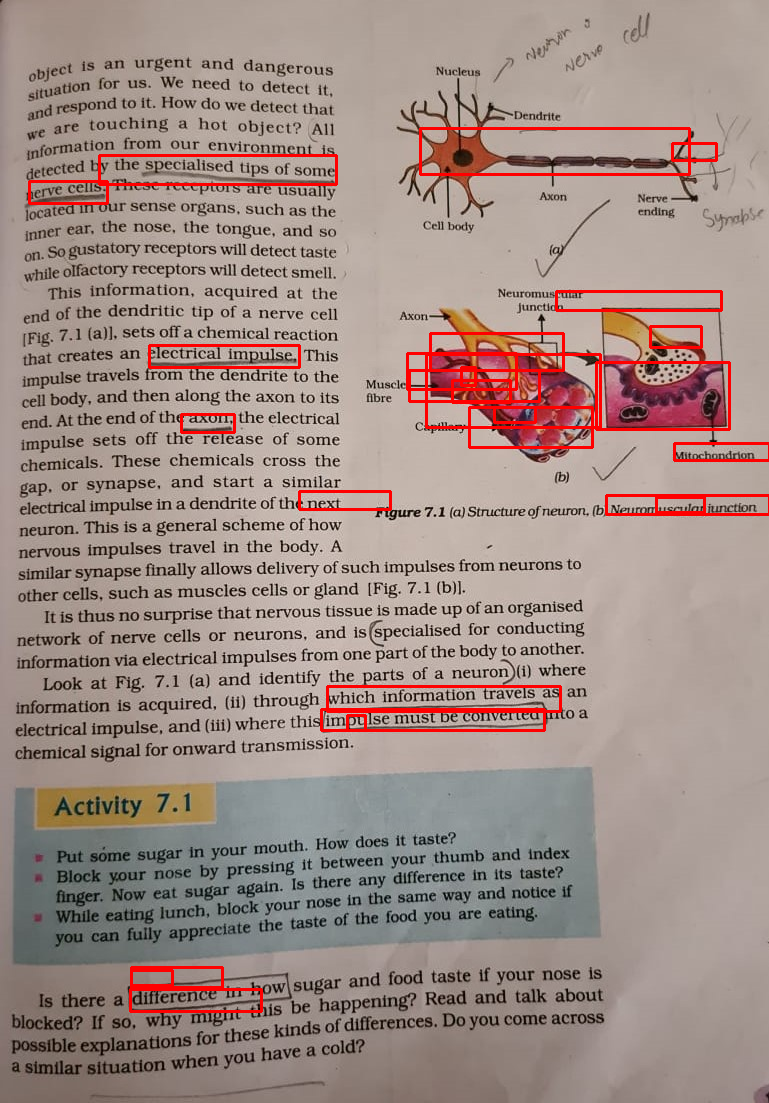

In [ ]:
import imutils
import time
from google.colab.patches import cv2_imshow 
from collections import OrderedDict 
# Let's load a simple image with 3 black squares 
image = cv2.imread("line_detected.png") 
cv2.waitKey(0) 
  
# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 


# Find Canny edges 
font = cv2.FONT_HERSHEY_COMPLEX
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 
  
# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,  cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
  
cv2_imshow(edged) 
cv2.waitKey(0) 
  
print("Number of Contours found = " + str(len(contours))) 
  
# Draw all contours 
# -1 signifies drawing all contours 
# cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

d=OrderedDict()
coords=[]
nuclei = [] 
l=[]
images=[]
lvalue=0
cvalue=0
svalue=0
line=[]
square=[]
circle=[]
contours = contours[::-1]
for cnt in (contours):     
      # nuclei.append(cnt)
      # print(cv2.contourArea(cnt))
      peri = cv2.arcLength(cnt, True)
      approx = cv2.approxPolyDP(cnt, 0.04 * peri, True)
      # print(len(approx))
      if (len(approx)==2):
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img, (x, y-height), (x+w, y+h), (0, 0, 255), 2)
        new=img[y-height:y+h, x:x+w]
        line.append(new)
        custom_config = r' -l eng --oem 1 --psm 6  -c preserve_interword_spaces=1 -c tessedit_char_whitelist="0123456789- " '
        text = pytesseract.image_to_string(new, config=custom_config)
        # regex = re.compile(r'[\n\r\t\x0c\,]')
        # text = regex.sub("", text)
        # text = text.strip()
        text = re.sub(r"[^ a-zA-Z0-9]+", '', text)
        if text != "":
          l.append(text)
          lvalue=lvalue+1
          d["L"+str(lvalue)]=text
      elif (len(approx)==4):
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img, (x, y-height), (x+w, y+h), (0, 0, 255), 2)
        new=img[y-height:y+h, x:x+w]
        square.append(new)
        text = pytesseract.image_to_string(new)
        # regex = re.compile(r'[\n\r\t\x0c\,]')
        # text = regex.sub("", text)
        # text = text.strip()
        text = re.sub(r"[ ^a-zA-Z0-9]+", '', text)
        if text != "":
          l.append(text)
          svalue=svalue+1
          d["S"+str(svalue)]=text
      else:
        x, y, w, h = cv2.boundingRect(cnt)
        # cv2.rectangle(img, (x, y-height), (x+w, y+h), (0, 0, 255), 2)
        new=img[y-height:y+h, x:x+w]
        circle.append(new)
        text = pytesseract.image_to_string(new)
        # regex = re.compile(r'[\n\r\t\x0c\,]')
        # text = regex.sub("", text)
        # text = text.strip()
        text = re.sub(r"[^ a-zA-Z0-9]+", '', text)
        if text != "":
          l.append(text)
          cvalue=cvalue+1
          d["C"+str(cvalue)]=text
print("line")
for i in range(len(line)-1,-1,-1):
  cv2_imshow(line[i])
print("square")
for i in range(len(square)-1,-1,-1):
  cv2_imshow(square[i])
print("circle")
for i in range(len(circle)-1,-1,-1):
  cv2_imshow(circle[i])
cv2_imshow(img)

In [ ]:
l=[x.strip() for x in l] # extra spaces rm
l=[re.sub(r"[^ a-zA-Z0-9]+", '', k) for k in l] #remove spl chars
l=[x for x in l if x] # non empty
print(l)

['i', 'y the specialised tips of some', 'perve CES', 'ee', 'eee', 'As', 'plectrical impulse', 'I    eel aw A', 'SNH i Wilks', 'SAWS', 'ar', 'eeea ae', 'AS', 'ees', 'REE', 'Lnext', 'Atos rneneseraiier dunction', 'which information travels as', 'impulse must De CONVETtEC', '2', 'at', 'J', 'difference']


In [ ]:
print(d)

OrderedDict([('L1', 'i '), ('L2', 'y the specialised tips of some'), ('L3', 'perve CES'), ('L4', 'ee'), ('L5', 'eee'), ('L6', 'As'), ('L7', 'plectrical impulse'), ('L8', ' I    eel aw A'), ('L9', ' SNH i Wilks'), ('S1', '\x0c'), ('S2', '\x0c'), ('L10', 'SAWS'), ('L11', 'ar'), ('L12', 'eeea ae'), ('L13', ' AS'), ('L14', 'ees'), ('L15', 'REE'), ('L16', 'Lnext'), ('L17', ' Atos rneneseraiier dunction'), ('L18', 'which information travels as'), ('L19', 'impulse must De CONVETtEC '), ('L20', '2'), ('L21', 'at '), ('L22', ' J'), ('L23', 'difference ')])


In [ ]:
print(len(l))
print(len(d.keys()))

23
25


In [ ]:
!pip install autocorrect

In [ ]:
from autocorrect import Speller
spell = Speller()
for i in l:
  print(spell(i), i)

i i
y the specialised tips of some y the specialised tips of some
serve ES perve CES
ee ee
eee eee
As As
electrical impulse plectrical impulse
I    eel aw A I    eel aw A
SH i Walks SNH i Wilks
SAS SAWS
ar ar
eee ae eeea ae
A AS
ees ees
EE REE
Next Lnext
Amos rneneseraiier function Atos rneneseraiier dunction
which information travels as which information travels as
impulse must De CONVETtEC impulse must De CONVETtEC
2 2
at at
J J
difference difference
